# Group Project: Pulsar Star Data 
### By DSCI 100, Group 77

## 0.0 Introduction 

### 0.1  What are Pulsar Stars:

Pulsar stars are a very rare type of neutron star that produce radio emission detectable on Earth (Cofield, 2016). As pulsar stars rotate rapidly and their emission beam sweeps across the sky, they produce detectable patterns of repeating radio emissions, which can be quantified as statistical variables.
 
### 0.2  Insight into the HTRU2 Dataset: 

The HTRU2 dataset contains data about pulsars, with examples caused by noise, as well as real pulsar examples (noise is other radio signals also picked up during pulsar star detection). The dataset contains a total of 17,898 samples of radio signals. This is an imbalanced dataset: 1,639 are real pulsar wave patterns while 16,259 are non-pulsar signals. Each pulsar star candidate is described by 8 continuous variables, and a single class variable.

The first four variables are simple statistics obtained from the integrated pulse profile, which are the mean, standard deviation, kurtosis, and skewness of emissions averaged over multiple rotations of the candidate pulsar star. As these data are collected over time, any emission signal can be smeared across that time period, and thus get masked behind noise. The DM-SNR curve shows the de-dispersed data, correcting for this dispersion - amplifying true signals and reducing noise. The 8 variables are as such:

1. Mean of the integrated profile.
2. Standard deviation of the integrated profile.
3. Excess kurtosis of the integrated profile.
4. Skewness of the integrated profile.
5. Mean of the DM-SNR curve.
6. Standard deviation of the DM-SNR curve.
7. Excess kurtosis of the DM-SNR curve.
8. Skewness of the DM-SNR curve.

Each row lists the variables first, and the class label is the final entry. The class labels used are 0 (non-pulsar) and 1 (pulsar).

### 0.3  Predictor reasoning:
 
As proposed in R. J. Lyon’s thesis, “Why Are Pulsars Hard To Find?”, candidate/sample numbers in the pulsar dataset rise exponentially, and majority of those are attributable to noise. The 8 variables given in the HTRU2 dataset were formed from a secondary analysis due to the fact that the original variables collected exhibit characteristics of imbalance, such as class inseparability, and thus were relatively poor separators of pulsar and non-pulsar samples (Lyon, 2016, pp. 221-223).

New variables (integrated pulse profile, DM-SNR curve) were designed so that they could maximize the separation between noise and non-noise candidates. Potential features were evaluated according to how well they each separated noise and non-noise candidates and the ability of each to reject noise was considered statistically. Those achieving the best separation, and the best classification results when used together with machine learning classifiers were then selected. **As such, all 8 of the variables of the integrated profile and the DM-SNR curve variables are important and must be used in our analysis.**
 

### 0.4  Question:

Can we use the HTRU2 dataset containing statistical information that describes pulsar star candidates to predict whether a future candidate is a pulsar star or not?

### 0.5 Methods & Results:

The following data analysis will include :
1. __Preliminary Data Analysis__

    - Cleaning, tidying, and manipulating data into training and testing sets using our chosen predictor vairables to be used for our KNN Classification Model.
    
2. __Choosing the optimal K-value for KNN Classifier__

    - Performing cross validation with our chosen predictors, tuning a new model and recipe and choosing an optimal K value to be used our model based on prediction accuracy.
    
3. __Testing the KNN Classifier using the proven K value__

     - Using our chosen K value, we create a new model specification for a classifier that will be used to predict on our testing data in order to evaluate it's effectiveness for real-world application.

## 1.0 Preliminary Exploratory Data Analysis:

For our proposal, we'll aim to build a classification system using the **_K_-nearest neighbours** algorithm since we are trying to predict a categorical variable.

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(cowplot)
options(repr.matrix.max.rows = 6)
set.seed(77)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

### 1.1 Fetching the the HTRU2 dataset

In [2]:
# Create a temp. file name (eg tempfile())
temp <- tempfile()       # declaring a temporary file

# Use download.file() to fetch the file into the temp. file
download.file("https://archive.ics.uci.edu/ml/machine-learning-databases/00372/HTRU2.zip", temp)

# Use unz() to extract HRTU_2.csv from temp. file
conn <- unz(temp, "HTRU_2.csv")
data <- read_csv(conn, col_names = FALSE)

# Remove the temp file via unlink()
unlink(temp)             # scrapping our temporary file

Rows: 17898 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): X1, X2, X3, X4, X5, X6, X7, X8, X9

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


### 1.2 Renaming columns and transforming `status` to a categorical variable

Here we `rename()` the columns according to the datasets associated `Readme.txt`, and `mutate()` our status column to a factor for use in classification functions.

As a refresher, the class labels used are 0 (non-pulsar) and 1 (pulsar).

In [3]:
data <- rename(data,
               mean = X1,
               st_dev = X2,
               e_kurtosis = X3,
               skewness = X4,
               snr_mean = X5,
               snr_st_dev = X6,
               snr_e_kurtosis = X7,
               snr_skewness = X8,
               status = X9) |>
    mutate(status = as_factor(status))
data
writeLines('Table [1]')

mean,st_dev,e_kurtosis,skewness,snr_mean,snr_st_dev,snr_e_kurtosis,snr_skewness,status
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
140.5625,55.68378,-0.2345714,-0.6996484,3.199833,19.11043,7.975532,74.24222,0
102.5078,58.88243,0.4653182,-0.5150879,1.677258,14.86015,10.576487,127.39358,0
103.0156,39.34165,0.3233284,1.0511644,3.121237,21.74467,7.735822,63.17191,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
119.3359,59.93594,0.1593631,-0.74302540,21.430602,58.87200,2.499517,4.595173,0
114.5078,53.90240,0.2011614,-0.02478884,1.946488,13.38173,10.007967,134.238910,0
57.0625,85.79734,1.4063910,0.08951971,188.306020,64.71256,-1.597527,1.429475,0


Table [1]


### 1.3 Checking for missing values in rows

To ensure that all our observations have a complete set of predictors, we should check our tibble for missing values. If we find any, they should be removed so our classification model is not working on incomplete data.

In [4]:
missing_vals <- sum(is.na(data))
missing_vals

[1] 0

All our rows are complete! We can continue without removing any observations.

### 1.4 Splitting the data into training and testing sets

In [5]:
data_split <- initial_split(data, prop = 0.75, strata = status)
data_train <- training(data_split)
data_test <- testing(data_split)

### 1.5 Accounting for Class Bias

Having split our dataset, we now need to account for any inherent class bias in the data to ensure our classification model is not negatively effected.

In [6]:
counts <- data_train |>
    group_by(status) |>
    summarize(n=n())

counts
writeLines('Table [2]')

status,n
<fct>,<int>
0,12196
1,1227


Table [2]


Looking at the _Table 2_ we can see that there are many more non pulsars than pulsars, which was to be expected since there are only a few 100 pulsar star occurrences for every 16,000 observations tested.

To correct for the class imbalance, we `downSample` the non-pulsar stars. Downsampling offered better quality than upsampling, likely because upsampling by the large factor of approximately 10 contributed towards overfitting.

In [7]:
library(caret)
data_balanced <- downSample(x = data_train[, -ncol(data_train)] , y = data_train$status, yname = "status")

counts_balanced <- data_balanced |>
    group_by(status) |>
    summarize(n = n())

counts_balanced
writeLines('Table [3]')

Loading required package: lattice


Attaching package: ‘caret’


The following objects are masked from ‘package:yardstick’:

    precision, recall, sensitivity, specificity


The following object is masked from ‘package:purrr’:

    lift




status,n
<fct>,<int>
0,1227
1,1227


Table [3]


### 1.6 Plotting the effect of downsampling

To demonstrate the effect of downsampling, we can plot graphs for the `mean` vs. `st_dev` using both the unbalanced and balanced data.

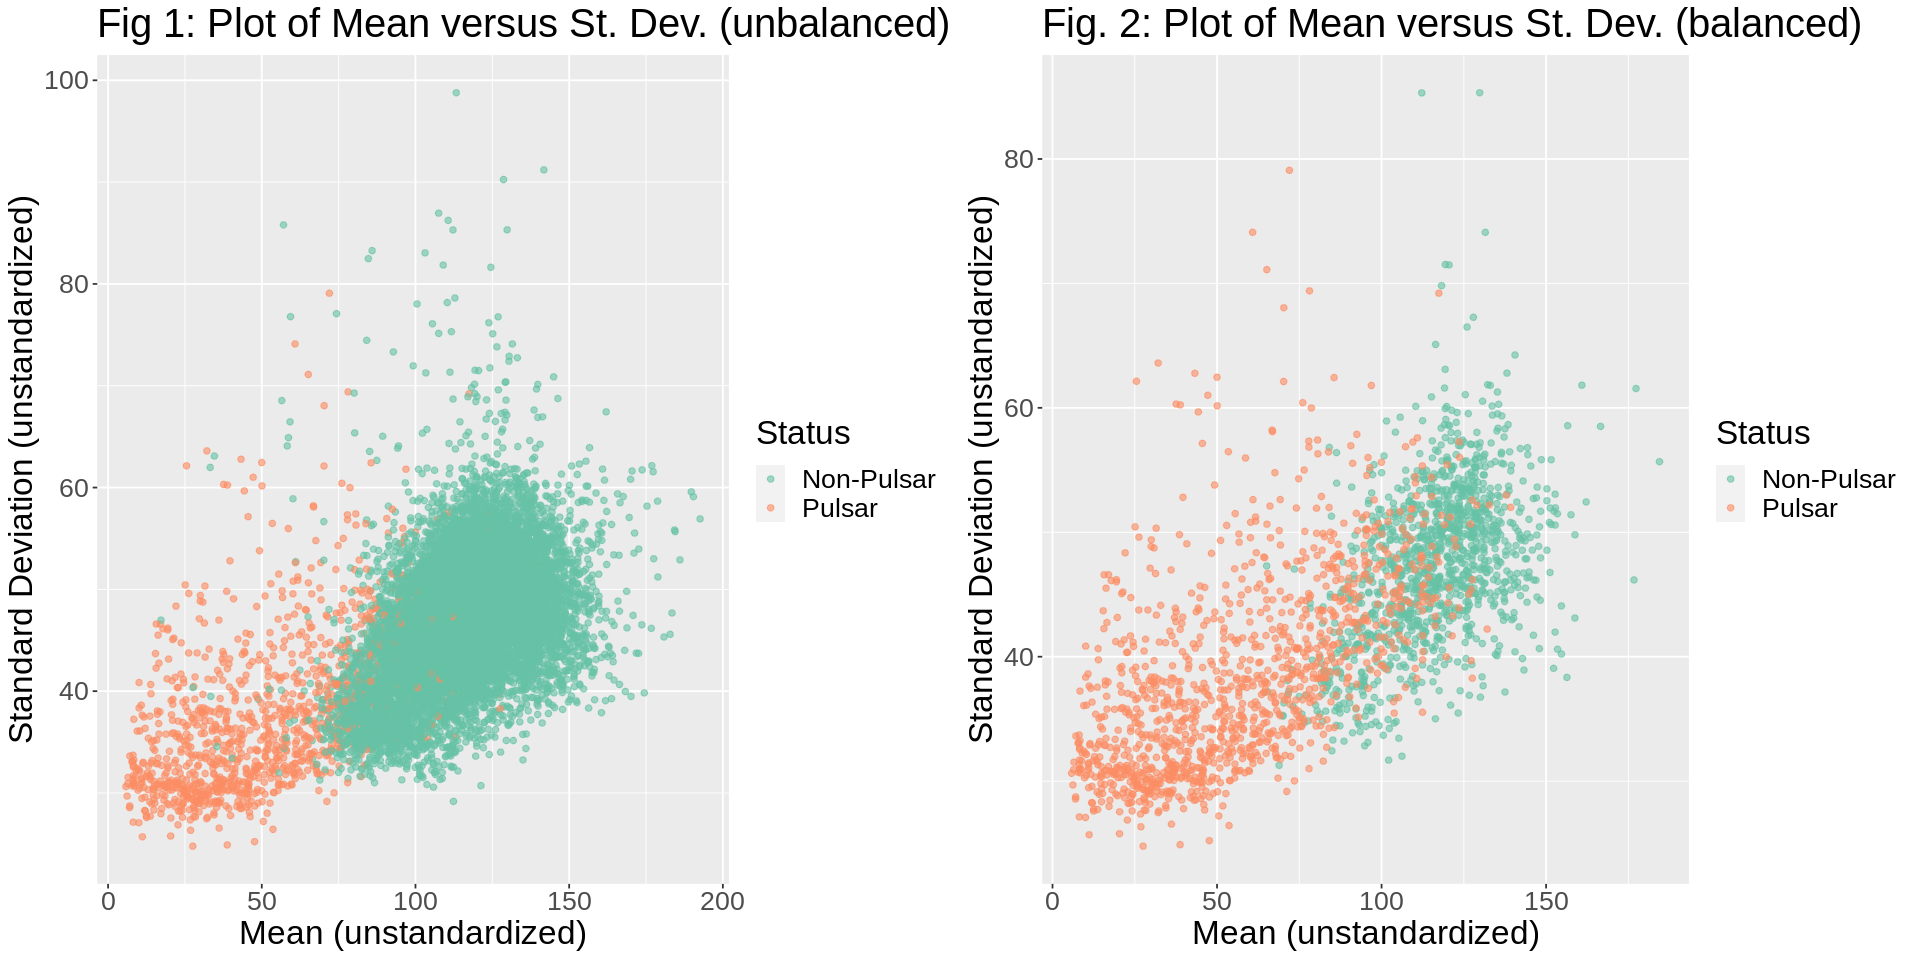

In [8]:
mean_stdev_orig <- data_train |>
  ggplot(aes(x = mean, y = st_dev, color = status)) +
  geom_point(alpha = 0.6) +
  labs(x = "Mean (unstandardized)", 
       y = "Standard Deviation (unstandardized)",
       color = "Status") +
    scale_color_brewer(palette = "Set2", labels = c("Non-Pulsar", "Pulsar")) +
  theme(text = element_text(size = 20)) +
  ggtitle('Fig 1: Plot of Mean versus St. Dev. (unbalanced)')

mean_stdev_bal <- data_balanced |>
  ggplot(aes(x = mean, y = st_dev, color = status)) +
  geom_point(alpha = 0.6) +
  labs(x = "Mean (unstandardized)", 
       y = "Standard Deviation (unstandardized)",
       color = "Status") +
    scale_color_brewer(palette = "Set2", labels = c("Non-Pulsar", "Pulsar")) +
  theme(text = element_text(size = 20))+
  ggtitle('Fig. 2: Plot of Mean versus St. Dev. (balanced)')

options(repr.plot.width = 16, repr.plot.height = 8)
plot_grid(mean_stdev_orig, mean_stdev_bal)

By inspection, we can tell that _Figure 2_ has a much less dense "cloud" of non-pulsar observations than _Figure 1_. This correction serves to influence our classification model such that observations that land farther away from the center of the pulsar "cloud" are not overwhelmed by the voting power of the much more commonly occuring non-pulsar observations in the *K*-nearest neighbors algorithm.

## 2.0 Building the Classification Model

### 2.1 Performing 5-fold cross-validation on `data_balanced`

In [9]:
data_vfold <- vfold_cv(data_balanced, v = 5, strata = status)

### 2.2 Creating a recipe using all predictors

We also center and scale the predictors since as statistical parameters, they all exist on differing scales. Standardization allows for each one to have an equal "say" in predicting an observation's class.

In [10]:
knn_recipe <- recipe(status ~ ., data = data_balanced) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

### 2.3 Creating the model specification with `tune()`

Here we use `tune()` as a preliminary step to deciding our optimal _K_ value, as this will allow us to estimate accuracies for a range of different _K_ values.

In [11]:
# create the centering / scaling recipe
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

### 2.4 Creating the `workflow()` analysis:

This is the most time costly part of our analysis due to the large amount of observations and the multiplied complexity of cross-validation and tuning with multiple values of _K_.

In [12]:
## WHY 100 K
k_vals <- tibble(neighbors = seq(from = 1, to = 40, by = 3))

start.time <- Sys.time()

# placing these steps in a workflow
knn_results <- workflow() |>
  add_recipe(knn_recipe) |>
  add_model(knn_spec) |>
  tune_grid(resamples = data_vfold, grid = k_vals)

end.time <- Sys.time() # stop
print(end.time - start.time)


Time difference of 43.37965 secs


### 2.5 Plotting the accuracy of each value of K tested

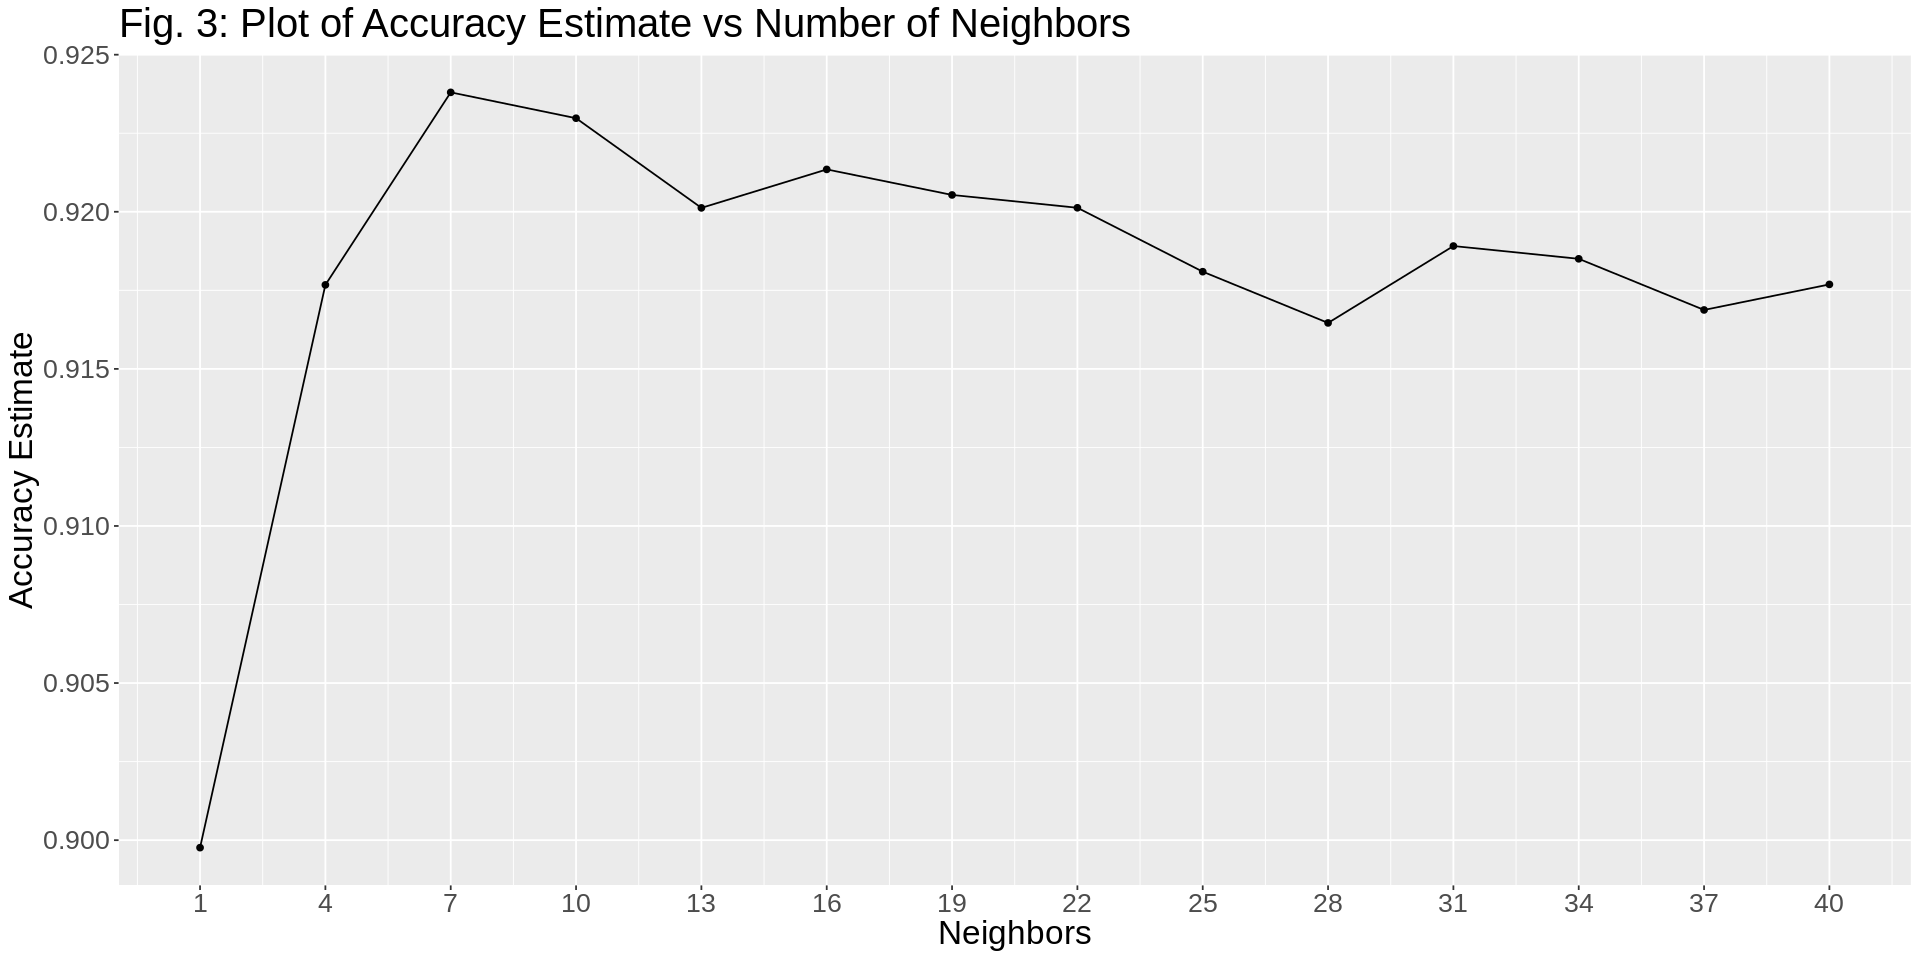

In [13]:
accuracies <- knn_results |>
  collect_metrics() |>
  filter(.metric == "accuracy")
options(repr.plot.width = 16, repr.plot.height = 8)

accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") +
  ggtitle("Fig. 3: Plot of Accuracy Estimate vs Number of Neighbors") +
  scale_x_continuous(breaks = seq(1, 40, by = 3)) +
  theme(text = element_text(size = 20))

accuracy_vs_k

Through _Figure 3_ we can tell that _K_ = 7 offers the best accuracy, however, we should choose _K_ = 10 to build our model since although _K_ = 7 yields a high accuracy estimate, accuracy drops off steeply if _K_ changes to a nearby value. Since _K_ = 10 yields the next highest accuracy estimate and does not exhibit this property, it is our optimal choice.

### 2.6 Building the final classification model with the optimal _K_

In [14]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 10) |>
  set_engine("kknn") |>
  set_mode("classification")

knn_fit <- workflow() |>
  add_recipe(knn_recipe) |>
  add_model(knn_spec) |>
  fit(data = data_balanced)

knn_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(10,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.07823961
Best kernel: rectangular
Best k: 10

### 2.7 Predicting on `data_test` and reporting the prediction accuracy and confusion matrix

In [15]:
prediction <- predict(knn_fit, data_test) |>
  bind_cols(data_test)

accuracy <- prediction |>
  metrics(truth = status, estimate = .pred_class) |>
  filter(.metric == "accuracy")

accuracy
writeLines('Table [4] \n')

confusion_mat <- prediction |>
             conf_mat(truth = status, estimate = .pred_class)

confusion_mat
writeLines('Table [5]')

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.9640223


Table [4] 



          Truth
Prediction    0    1
         0 3947   45
         1  116  367

Table [5]


Our findings from the accuracy report _(Table 4)_ show that our model is ~96% accurate (very good), but it misses ~11% of pulsars (less good) which can be seen from the confusion matrix _(Table5)_.

## 3.0 Discussion

Through our analysis above, we found that our model produced an accuracy of 96.4% with our optimal _K_ value of 10. The model correctly identified 3947 non-pulsars and 367 pulsars, while incorrectly identifying 116 non-pulsars and 45 pulsars. Therefore, we believe we were able to fulfill this paper's aim to develop a model to predict whether a candidate star is a pulsar or not.

We expected our model to predict with high accuracy since the 8 predictors we used were based on well-founded statistical theory, however, the 11% miss rate of true pulsars is concerning. Due to the scarcity of pulsars as a whole, failing to correctly identify a true pulsar is unfavorable when compared failing to identify a true non-pulsar. Thus, we could aim to improve our model by reducing the miss rate of pulsars, and hits could be manually afterwards checked for confirmation. Again, since there are only a few 100 pulsar stars for every 16,000 stars tested, this would likely not be too much additional work and could prevent scientists from missing key pulsar stars needed for research.

Through our findings we hope to augment the capabilities of scientists studying pulsar stars, as well as any research where radio noise is a prominent issue, such as long distance encrypted communications. The identification and further use of pulsar stars through research currently plays an important role in astrophysics, specifically when studying super dense cosmic objects, measuring time and testing the limits of relativity theory (ScienceAlert, 2020).

Some future questions and research our analysis could lead to are:

1. Can our model and methods be implemented if presented with a different dataset or application where radio noise needs to be filtered? How should we adjust our model and/or our classification methods values accordingly? 
2. How can we combine our analysis with equipment used to collect pulsar star data to improve/reduce radio noise? 
3. What additional variables or methods could help us reduce the miss rate of true pulsars?

## 4.0 References:
__1.__ Lyon, R. (2016). Why are pulsars hard to find?. The University of Manchester (United Kingdom)

__2.__ Cofield, C. (2016, April 22). What are pulsars? Space.com. Retrieved December 4, 2022, from https://www.space.com/32661-pulsars.html

__3.__ Staff, S. A. (2020, March 10). What is a pulsar? ScienceAlert. Retrieved December 7, 2022, from https://www.sciencealert.com/pulsar